# Problem 1

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, norm, normaltest
from statsmodels.tsa.arima.model import ARIMA

In [56]:
def cla_brown(P0, std, num_sample):
    r = np.random.normal(0, std, num_sample) # in the simulation, assume mean = 0
    Pt = P0 + r
    return Pt

In [57]:
def arith(P0, std, num_sample):
    r = np.random.normal(0, std, num_sample) # in the simulation, assume mean = 0
    Pt = P0 * (1 + r)
    return Pt

In [58]:
def geo_brown(P0, std, num_sample):
    r = np.random.normal(0, std, num_sample) # in the simulation, assume mean = 0
    Pt = P0 * np.exp(r)
    return Pt

In [67]:
# for the simulation, assume price0 = 1, standard deviation = 0.5
P0 = 1
std = 0.5
num_sample = 1000

p_cla_brown = cla_brown(P0, std, num_sample)
mean_cla_brown = np.mean(p_cla_brown)
std_cla_brown = np.std(p_cla_brown)
print("simulated mean of classic brownian simulation is {:.4f}".format(mean_cla_brown))
print("simulated standard deviation of classic brownian simulation is {:.4f}".format(std_cla_brown))

p_arith = arith(P0, std, num_sample)
mean_arith = np.mean(p_arith)
std_arith = np.std(p_arith)
print("simulated mean of arithmetic simulation is {:.4f}".format(mean_arith))
print("simulated standard deviation of arithmatic simulation is {:.4f}".format(std_arith))

p_geo_brown = geo_brown(P0, std, num_sample)
mean_geo_brown = np.mean(p_geo_brown)
std_geo_brown = np.std(p_geo_brown)
print("simulated mean of geometric brownian simulation is {:.4f}".format(mean_geo_brown))
print("simulated standard deviation of geometric brownian simulation is {:.4f}".format(std_geo_brown))


simulated mean of classic brownian simulation is 1.0254
simulated standard deviation of classic brownian simulation is 0.4893
simulated mean of arithmetic simulation is 0.9905
simulated standard deviation of arithmatic simulation is 0.5153
simulated mean of geometric brownian simulation is 1.1234
simulated standard deviation of geometric brownian simulation is 0.5941


In [70]:
ex_mean_cla_brown = P0
ex_std_cla_brown = std
print("expected mean of classic brownian simulation is {:.4f}".format(ex_mean_cla_brown))
print("expected standard deviation of classic brownian simulation is {:.4f}".format(ex_std_cla_brown))

ex_mean_arith = P0
ex_std_arith = P0 * std
print("expected mean of arithmatic simulation is {}".format(ex_mean_arith))
print("expected standard deviation of arithmatic simulation is {:.4f}".format(ex_std_arith))

ex_mean_geo_brown = P0 * np.exp((std ** 2) / 2)
ex_std_geo_brown = P0 * np.sqrt((np.exp(std ** 2) - 1) * np.exp(std ** 2))
print("expected mean of geometric brownian simulation is {:.4f}".format(ex_mean_geo_brown))
print("expected standard deviation of geometric brownian simulation is {:.4f}".format(ex_std_geo_brown))

expected mean of classic brownian simulation is 1.0000
expected standard deviation of classic brownian simulation is 0.5000
expected mean of arithmatic simulation is 1
expected standard deviation of arithmatic simulation is 0.5000
expected mean of geometric brownian simulation is 1.1331
expected standard deviation of geometric brownian simulation is 0.6039


/Users/yanghaochen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yanghaochen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yanghaochen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

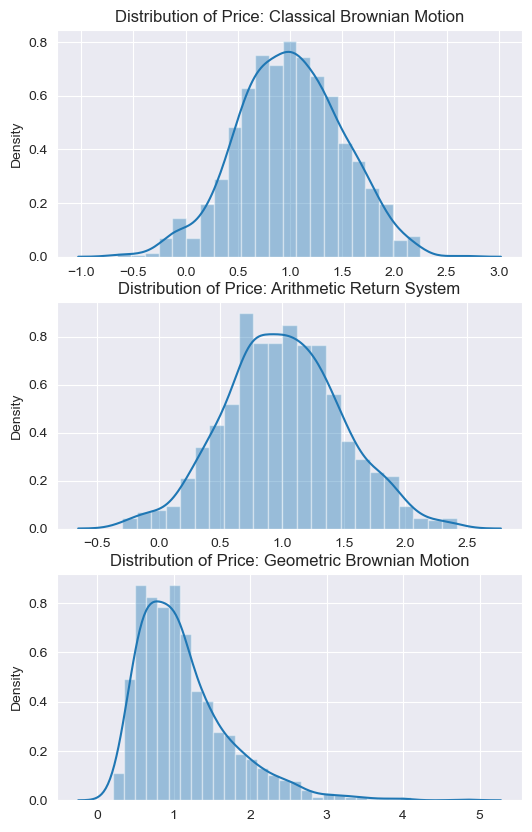

In [61]:
fig, axes = plt.subplots(3, 1, figsize=(6, 10))
sns.distplot(p_cla_brown, ax=axes[0])
sns.distplot(p_arith, ax=axes[1])
sns.distplot(p_geo_brown, ax=axes[2])
axes[0].set_title("Distribution of Price: Classical Brownian Motion")
axes[1].set_title("Distribution of Price: Arithmetic Return System")
axes[2].set_title("Distribution of Price: Geometric Brownian Motion")
plt.show()

# Problem 2

In [8]:
# implement return_calculate() as Prof. Pazzula gave us
def return_calculate(prices, method="DISCRETE", dateColumn="Date"):
    vars = prices.columns.values.tolist() # extract the index of columns (column names), and convert it into a list
    nVars = len(vars) # number of columns
    vars.remove(dateColumn) # remove date column to get pure data
    if nVars == len(vars): # if the number of columns does not change after we remove the date column, this means we don't have the date column from the start, and such time series analysis will be meaningless, thus we raise an error on it
        raise ValueError(f"dateColumn: {dateColumn} not in DataFrame: {vars}")
    nVars = nVars - 1 # update the number of columns by reflecting the removal of date column
    p = np.array(prices.drop(columns=[dateColumn])) # drop the date column and convert to np date frame
    n = p.shape[0] # num of rows
    m = p.shape[1] # num of column
    p2 = np.empty((n-1, m)) # creates an empty NumPy array p2 with shape (n-1, m)
    for i in range(n-1):
        for j in range(m):
            p2[i,j] = p[i+1,j] / p[i,j]
    if method.upper() == "DISCRETE":
        p2 = p2 - 1.0 # if it is discrete compounding, then r = pt / pt-1 - 1
    elif method.upper() == "LOG":
        p2 = np.log(p2) # if it is continuous compounding, then r = ln(pt / pt-1)
    else:
        raise ValueError(f"method: {method} must be in (\"LOG\",\"DISCRETE\")") # there is no method other than discrete or compounding, so input error
    dates = prices[dateColumn][1:] # get the date, as the first row corresponds to the first day, and first day has no return, so we start from the second row
    out = pd.DataFrame({dateColumn: dates}) # initialize an empty "out" df, with its dateColumn set to be dates extracted
    for i in range(nVars): # add all rows calculated values corresponding to the stock name in that column in vars, then input this matrix into df "out"
        out[vars[i]] = p2[:,i]
    return out # "out" is the df having stock name, date and return

In [9]:
prices = pd.read_csv('DailyPrices.csv')
returns = return_calculate(prices)

/var/folders/zd/m53hqz696cnd23z0k2c1g9zc0000gn/T/ipykernel_22989/2568714451.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[vars[i]] = p2[:,i]
/var/folders/zd/m53hqz696cnd23z0k2c1g9zc0000gn/T/ipykernel_22989/2568714451.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[vars[i]] = p2[:,i]


In [10]:
is_meta = returns["META"] # confirm there is a "META" column
is_meta.head()

1   -0.030479
2   -0.011103
3    0.011669
4    0.010412
5    0.043749
Name: META, dtype: float64

In [11]:
meta_ret = returns['META']
#Remove the mean
trans_meta_ret = meta_ret - meta_ret.mean()

In [12]:
def calculate_VaR(data, alpha=0.05):
  return -np.quantile(data, alpha)

In [21]:
# calculate VaR using a normal distribution
def norm_VaR(returns, alpha=0.05, num_sample=1000):
        mean = returns.mean()
        std = returns.std()
        Rt = np.random.normal(mean, std, num_sample)
        var = calculate_VaR(Rt, alpha)
        return var, Rt
var_norm, Rt_norm = norm_VaR(trans_meta_ret)
print(var_norm)

0.05241182892196729


In [22]:
# calculate Var using a normal distribution with an exponentially weighted variance of lambda = 0.97
# the function to calculate exponentially weighted covariance
def expo_weighted_cov(ret_data, w_lambda=0.94): # default lambda to be 0.97
    weight = np.zeros(ret_data.shape[0])
    for i in range(len(ret_data)):
        weight[len(ret_data)-1-i]  = (1-w_lambda) * w_lambda ** i
    weight = weight/sum(weight)
    adj_ret_means = ret_data - ret_data.mean()
    expo_w_cov = adj_ret_means.T @ np.diag(weight) @ adj_ret_means
    return expo_w_cov

# meta_ew = expo_weighted_cov(trans_meta_ret)
# print(meta_ew)

In [23]:
# the function to calculate Var based on normal dist with ew var
def norm_ew_VaR(returns, alpha=0.05, num_sample=1000):
        mean = returns.mean()
        std = np.sqrt(expo_weighted_cov(returns, w_lambda=0.94))
        Rt = np.random.normal(mean, std, num_sample)
        var = calculate_VaR(Rt, alpha)
        return var, Rt

var_norm_ew, Rt_norm_ew = norm_ew_VaR(trans_meta_ret)
print(var_norm_ew)

0.030177224870720252


In [24]:
# calculate VaR using a MLE fitted T distribution
def MLE_T_VaR(returns, alpha=0.05, num_sample=1000):
    result = t.fit(returns, method="MLE") # fit the returns into MLE
    df = result[0] # used to get the required parameters for T distribution simulation
    loc = result[1]
    scale = result[2]
    Rt = t(df, loc, scale).rvs(num_sample) # generate num_sample random variates from the t-distribution of (df, loc, scale)
    var = calculate_VaR(Rt, alpha)
    return var, Rt

var_mle_t, Rt_mle_t = MLE_T_VaR(trans_meta_ret)
print(var_mle_t)

0.045809423026798836


In [25]:
# calculate VaR using AR(1)
def ar1_VaR(returns, alpha=0.05, num_sample=1000):
    result = ARIMA(returns, order=(1, 0, 0)).fit()
    t_a = result.params[0]  # constant term
    t_phi = result.params[1]  # coefficient of the lagged term
    resid_std = np.std(result.resid) # the residual of the fit
    last_return = returns[len(returns)] # obtain the last return in returns
    Rt = t_a + t_phi * last_return + np.random.normal(loc=0, scale=resid_std, size=num_sample) # alpha + phi * Rt-1 (since it is AR(1)) + residual, which we use exact residual of the fit, to some extent an element of "simulation of historical distribution"
    var = calculate_VaR(Rt, alpha)
    return var, Rt
var_ar1, Rt_ar1 = ar1_VaR(trans_meta_ret)
print(var_ar1)

0.05766410527716794


In [28]:
# calculating VaR using historical distribution
def his_var(returns, alpha=0.05):
    Rt = returns.values # no further simulation, just obtain all data to get historical distribution
    var = calculate_VaR(Rt, alpha)
    return var, Rt

var_his, Rt_his = his_var(trans_meta_ret)
print(var_his)

0.03948424995533789


In [29]:
print("VaR using a normal distribution = {:.4%}".format(var_norm))
print("VaR using a normal distribution with an Exponentially Weighted Variance = {:.4%}".format(var_norm_ew))
print("VaR using a MLE fitted T distribution = {:.4%}".format(var_mle_t))
print("VaR using a fitted AR(1) model = {:.4%}".format(var_ar1))
print("VaR using a historic simulation = {:.4%}".format(var_his))

VaR using a normal distribution = 5.2412%
VaR using a normal distribution with an Exponentially Weighted Variance = 3.0177%
VaR using a MLE fitted T distribution = 4.5809%
VaR using a fitted AR(1) model = 5.7664%
VaR using a historic simulation = 3.9484%


In [30]:
# transfer to dollar loss
def ret_to_dollar(ret_var, return_s, price_s):
    dollar_var = (ret_var - return_s.mean()) * price_s.values[-1]
    return dollar_var

print("VaR in dollar using a normal distribution = {:.4f}".format(ret_to_dollar(var_norm, meta_ret, prices['META'])))
print("VaR in dollar using a normal distribution with an Exponentially Weighted Variance = {:.4f}".format(ret_to_dollar(var_norm_ew, meta_ret, prices['META'])))
print("VaR in dollar using a MLE fitted T distribution = {:.4f}".format(ret_to_dollar(var_mle_t, meta_ret, prices['META'])))
print("VaR in dollar using a fitted AR(1) model = {:.4f}".format(ret_to_dollar(var_ar1, meta_ret, prices['META'])))
print("VaR in dollar using a historic simulation = {:.4f}".format(ret_to_dollar(var_his, meta_ret, prices['META'])))

VaR in dollar using a normal distribution = 14.8418
VaR in dollar using a normal distribution with an Exponentially Weighted Variance = 8.1918
VaR in dollar using a MLE fitted T distribution = 12.8671
VaR in dollar using a fitted AR(1) model = 16.4126
VaR in dollar using a historic simulation = 10.9754


In [54]:
print(meta_ret.mean())

0.0027871363461748136


# Problem 3

In [31]:
portfolio = pd.read_csv('portfolio.csv')
prices = pd.read_csv('DailyPrices.csv')

In [24]:
portfolio.head()

In [25]:
prices.head()

,Portfolio,Stock,Holding
0,A,AAPL,158
1,A,MSFT,178
2,A,AMZN,110
3,A,NVDA,54
4,A,GOOGL,69


In [32]:
portfolioA = portfolio[portfolio['Portfolio'] == 'A'].drop('Portfolio', axis = 1)
portfolioB = portfolio[portfolio['Portfolio'] == 'B'].drop('Portfolio', axis = 1)
portfolioC = portfolio[portfolio['Portfolio'] == 'C'].drop('Portfolio', axis = 1)

all_assets = portfolio.drop('Portfolio', axis = 1) # the default drop drops rows, use axis = 1 to indicate drop a column
portfolioT = all_assets.groupby(["Stock"], as_index=False)["Holding"].sum() # as_index makes Stock column a real column, not index column
portfolioT.head()

,Stock,Holding
0,AAPL,158
1,ABBV,68
2,ABT,109
3,ACN,58
4,ADBE,154


In [33]:
def parsing_port(aPortfolio, prices):
    daily_price = pd.concat([prices["Date"], prices[aPortfolio["Stock"]]], axis=1) # concat "date" and all columns that is in aPortfolio, concat by columns
    holdings = aPortfolio["Holding"]
    port_value = np.dot(prices[aPortfolio["Stock"]].tail(1), aPortfolio['Holding']) # row (the last one price of each corresponding stock in aPortfolio) * column (the holdings of each corresponding stock in Portfolio)
    return daily_price, holdings, port_value


In [34]:
def expo_weighted_cov_valueOnly(ret_data,w_lambda): # we need to rewrite this as previous function have heads in the matrix, it doesn't matter when we just want std, but matters
    weight = np.zeros(ret_data.shape[0])
    for i in range(len(ret_data)):
        weight[len(ret_data)-1-i]  = (1-w_lambda)*w_lambda**i
    weight = weight/sum(weight)
    ret_means = ret_data - ret_data.mean()
    expo_w_cov = ret_means.T.values @ np.diag(weight) @ ret_means.values
    return expo_w_cov

In [35]:
# calculate VaR using Delta Normal
def cal_delta_VaR(aPortfolio, prices, alpha=0.05, w_lambda=0.94):
    daily_price, holdings, port_value = parsing_port(aPortfolio, prices)
    returns = return_calculate(daily_price).drop("Date", axis = 1)
    latest_prices = daily_price.drop("Date", axis = 1).tail(1).values # tail() as opposite to head(), get last n rows
    dR_dr = latest_prices.T * holdings.values.reshape(-1,1) / port_value # transpose and re-organize into two columns, reshape(-1, 1) means reshape to be 1 column, -1 means num of rows will auto be set to required
    cov_mtx = expo_weighted_cov_valueOnly(returns, w_lambda)
    R_std = np.sqrt(np.transpose(dR_dr) @ cov_mtx @ dR_dr)
    var = (-1) * port_value * norm.ppf(alpha) * R_std
    return var[0][0] # var is [[]]

In [36]:
delta_var_A = cal_delta_VaR(portfolioA, prices)
print("Delta Normal VaR of Portfolio A = {}".format(delta_var_A.round(4)))
delta_var_B = cal_delta_VaR(portfolioB, prices)
print("Delta Normal VaR of Portfolio B = {}".format(delta_var_B.round(4)))
delta_var_C = cal_delta_VaR(portfolioC, prices)
print("Delta Normal VaR of Portfolio C = {}".format(delta_var_C.round(4)))
delta_var_T = cal_delta_VaR(portfolioT, prices)
print("Delta Normal VaR of Portfolio TOTAL = {}".format(delta_var_T.round(4)))

Delta Normal VaR of Portfolio A = 15426.968
Delta Normal VaR of Portfolio B = 8082.5724
Delta Normal VaR of Portfolio C = 18163.2916
Delta Normal VaR of Portfolio TOTAL = 38941.3757


/var/folders/zd/m53hqz696cnd23z0k2c1g9zc0000gn/T/ipykernel_22989/2568714451.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[vars[i]] = p2[:,i]


In [37]:
# calculate VaR using historical distribution
def cal_his_VaR(aPortfolio, prices, alpha=0.05, num_sample = 1000):
    daily_price, holdings, port_value = parsing_port(aPortfolio, prices)
    returns = return_calculate(daily_price).drop("Date", axis = 1)
    simu = returns.sample(num_sample, replace=True)
    latest_prices = daily_price.drop("Date", axis = 1).tail(1).values.reshape(daily_price.shape[1] - 1)
    simu_change = np.dot(simu * latest_prices, holdings)
    var = np.percentile(simu_change, alpha*100) * (-1)
    return var

In [38]:
his_var_A = cal_his_VaR(portfolioA, prices)
print("Historical Simulated VaR of Portfolio A = {}".format(his_var_A.round(4)))
his_var_B = cal_his_VaR(portfolioB, prices)
print("Historical Simulated VaR of Portfolio B = {}".format(his_var_B.round(4)))
his_var_C = cal_his_VaR(portfolioC, prices)
print("Historical Simulated VaR of Portfolio C = {}".format(his_var_C.round(4)))
his_var_T = cal_his_VaR(portfolioT, prices)
print("Historical Simulated VaR of Portfolio TOTAL = {}".format(his_var_T.round(4)))

Historical Simulated VaR of Portfolio A = 16525.829
Historical Simulated VaR of Portfolio B = 10757.91
Historical Simulated VaR of Portfolio C = 21981.3925
Historical Simulated VaR of Portfolio TOTAL = 47618.7784


/var/folders/zd/m53hqz696cnd23z0k2c1g9zc0000gn/T/ipykernel_22989/2568714451.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[vars[i]] = p2[:,i]


In [53]:
daily_price, holdings, port_value = parsing_port(portfolioA, prices)
returns = return_calculate(daily_price).drop("Date", axis = 1)
simu = returns.sample(1000, replace=True)
print(simu.shape[0])
print(simu.shape[1])
latest_prices = daily_price.drop("Date", axis = 1).tail(1).values.reshape(-1,1)
# print(latest_prices)
pchange = simu * latest_prices.T
# print(pchange)
holdings = holdings.values.reshape(-1, 1)
# print(holdings)
sc = pchange @ holdings
var = calculate_VaR(sc, 0.05)
print(var)

1000
33
17090.97699657557
